In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 解題步驟：

1. 讀取 titanic.csv
2. 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')
3. 分析缺失值，練習繪製直方圖(如下圖二)
4. 分別以平均值及眾數填補
5. 將剩下是字串的欄位轉為數值(Age and Embarked)
6. 將資料切分為訓練及測試集
7. 輸入隨機森林訓練並測試模型在訓練及測試集上的準確度

#### 圖一
<img src="./data/titanic.png" style="zoom:30%;" />

#### 圖二
<img src="./data/hist.png" style="zoom:100%;" />

## 讀取資料

In [120]:
""" Your code here: 讀取 titanic.csv """
titanic = pd.read_csv('titanic.csv')
titanic_fe = titanic.copy()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 刪除無用特徵('PassengerId', 'Name', 'Cabin', 'Ticket')

In [121]:
""" Your code here: """
titanic_fe = titanic.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'])
titanic_fe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 填補缺失值
1. Discrete: 繪製圖表以判斷該如何填補
2. Continual: 使用平均值或中位數
3. 若缺失值過多則刪除

In [122]:
""" Your code here: """
#刪掉無用特徵後，先填補缺失值，發現有缺失值的是age跟 embarked，其中年齡是continual我使用平均數做填滿。
#Age
titanic_fe.Age = titanic.Age.fillna(titanic.Age.mean())
titanic_fe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


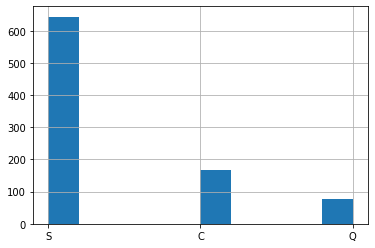

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [123]:
#Embarked而embark是discrete的所以我要先作圖
#觀察它的形狀再做填補值
titanic_fe.Embarked.hist()
plt.show()
#由圖可知S佔大多數那我也可以猜想說缺失值高機率是S所以我把缺失值都用S作替代
titanic_fe.Embarked = titanic_fe.Embarked.fillna("S")
titanic_fe.info()

## Feature transformation(Sex and Embarked)
- Label encoding
- One-hot encoding

In [124]:
""" Your code here: """
#把性別變成0,1的變數，而且性別只有兩種所以用le、產出0,1來分別很恰當，且函數能直接將那一行轉換成數字取代到該行特徵中
le = LabelEncoder()
titanic_fe.Sex = le.fit_transform(titanic_fe.Sex)
titanic_fe.Sex

#至於Embarked有三種 且這三種沒有明顯的高低分別，如果直截用Le，會造成額外的相關性，且資料本身是不具備的，因此可以使用one_hot encoding
#取一個新的變數叫做embarked 然後做dummy，給每一行前面有一個Embarked_0、1以利識別"有三個變數只會有兩個dummies"
embarked = pd.get_dummies(titanic_fe.Embarked, prefix = "Embarked")
embarked
#把這個新的變數用"行"=axis = 1 不是列合併axis =0合併合併到原本的資料中
titanic_fe = pd.concat([titanic_fe,embarked] , axis = 1)
titanic_fe

#舊的Embarked我不要了，所以要drop掉
titanic_fe.drop(columns = ["Embarked"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


## 切分訓練集及測試集

In [128]:
""" Your code here: """
#舊的Embarked我不要了，所以要drop掉
#Y是我們最主要研究的項目、X是除了Y軸之外其他的特徵

titanic_fe_dropembarked = titanic_fe.drop(columns = ["Embarked"])
Y = np.asarray(titanic_fe_dropembarked.Survived)
X = np.asarray(titanic_fe_dropembarked.drop(columns = "Survived"))
x_train,x_test,y_train,y_test = train_test_split(X ,Y,test_size = 0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


## Training

In [129]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

## Evaluation

In [130]:
print('Training report')
pred = RF.predict(x_train)
print(classification_report(y_train, pred))

print()
print('Testing report')
pred = RF.predict(x_test)
print(classification_report(y_test, pred))

Training report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       415
           1       0.98      0.96      0.97       253

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668


Testing report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       134
           1       0.80      0.78      0.79        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.83      0.83      0.83       223

